In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
cancer_data_df = pd.merge(clinical_trial_df, mouse_drug_df, on="Mouse ID")

# Display the data table for preview
cancer_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor = cancer_data_df.groupby(['Drug', 'Timepoint'])

mean_tumor_volume = mean_tumor['Tumor Volume (mm3)'].mean()


# Convert to DataFrame

grouped_mean_tumor_volume = pd.DataFrame({'Tumor Volume (mm3)' : mean_tumor_volume})


# Preview DataFrame
grouped_mean_tumor_volume.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = mean_tumor['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
grouped_tumor_volume_sem = pd.DataFrame({'Tumor Volume (mm3)' : tumor_volume_sem})

# Preview DataFrame
grouped_tumor_volume_sem.reset_index().head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_grouped_mean_tumor_volume = grouped_mean_tumor_volume.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

# Preiew that Reformatting worked
reformat_grouped_mean_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
reformat_grouped_tumor_volume_sem = grouped_tumor_volume_sem.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

# Preiew that Reformatting worked
reformat_grouped_tumor_volume_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


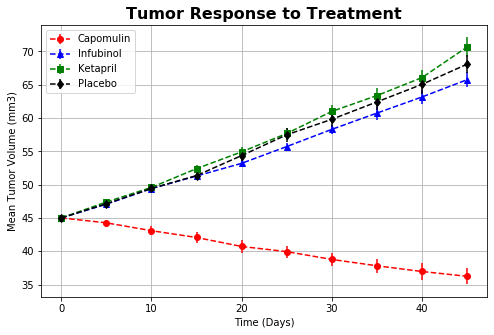

In [6]:
# Generate the Plot (with Error Bars)
# After experiementing with various plot formats from activities and online, I created my plot codes, using my own variables and dataframes, drawing upon examples by rkalhorn @ https://github.com/rkalhorn/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_RBK.ipynb
mean_data = reformat_grouped_mean_tumor_volume.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

plt.figure(figsize = (8,5))
plt.title("Tumor Response to Treatment", fontsize=16, fontweight="bold")
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid()

for drug in drugs:
   plt.errorbar(mean_data, reformat_grouped_mean_tumor_volume[drug], reformat_grouped_tumor_volume_sem[drug], 
                linestyle = "--", color = marker[drug][1], marker=marker[drug][0])

plt.legend({"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]})

# Save the Figure
plt.savefig("TumorResponseToTreatment.png")

# Show the Figure
plt.show()


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites = cancer_data_df.groupby(['Drug', 'Timepoint'])

mean_met_sites = met_sites['Metastatic Sites'].mean()


# Convert to DataFrame

grouped_mean_met_sites = pd.DataFrame({'Metastatic Sites' : mean_met_sites})


# Preview DataFrame
grouped_mean_met_sites.reset_index().head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = met_sites['Metastatic Sites'].sem()

# Convert to DataFrame

grouped_met_sites_sem = pd.DataFrame({'Metastatic Sites' : met_sites_sem})

# Preview DataFrame

grouped_met_sites_sem.reset_index().head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
reformat_grouped_mean_met_sites = grouped_mean_met_sites.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preiew that Reformatting worked
reformat_grouped_mean_met_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
reformat_grouped_met_sites_sem = grouped_met_sites_sem.pivot_table('Metastatic Sites', ['Timepoint'], 'Drug')

# Preiew that Reformatting worked
reformat_grouped_met_sites_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


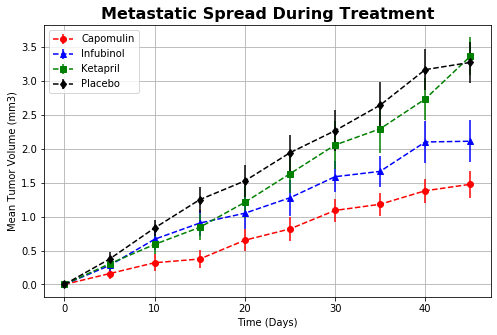

In [11]:
# Generate the Plot (with Error Bars)
# After experiementing with various plot formats from activities and online, I created my plot codes, using my own variables and dataframes, drawing upon examples by rkalhorn @ https://github.com/rkalhorn/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_RBK.ipynb
mean_data = reformat_grouped_mean_met_sites.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

plt.figure(figsize = (8,5))
plt.title("Metastatic Spread During Treatment", fontsize=16, fontweight="bold")
plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid()

for drug in drugs:
   plt.errorbar(mean_data, reformat_grouped_mean_met_sites[drug], reformat_grouped_met_sites_sem[drug], 
                linestyle = "--", color = marker[drug][1], marker=marker[drug][0])

plt.legend({"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]})

# Save the Figure
plt.savefig("MetastaticResponseToTreatment.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mean_data = reformat_grouped_mean_tumor_volume.index
mouse_count = cancer_data_df.groupby(['Drug', 'Timepoint'])

total_mouse_count = mouse_count['Mouse ID'].nunique()


# Convert to DataFrame
grouped_mouse_count = pd.DataFrame({'Mouse Count' : total_mouse_count})


# Preview DataFrame
grouped_mouse_count.reset_index().head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
reformat_grouped_mouse_count = grouped_mouse_count.pivot_table('Mouse Count', ['Timepoint'], 'Drug')

# Preview that Reformatting worked
reformat_grouped_mouse_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


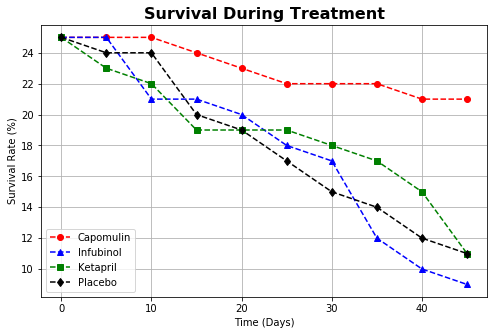

In [14]:
# Generate the Plot (Accounting for percentages)
# After experiementing with various plot formats from activities and online, I created my plot codes, using my own variables and dataframes, drawing upon examples by rkalhorn @ https://github.com/rkalhorn/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_RBK.ipynb
mean_data = reformat_grouped_mouse_count.index

drugs = ["Capomulin","Infubinol", "Ketapril", "Placebo"]
marker = {"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]}

plt.figure(figsize = (8,5))
plt.title("Survival During Treatment", fontsize=16, fontweight="bold")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

for drug in drugs:
   plt.errorbar(mean_data, reformat_grouped_mouse_count[drug],  
                linestyle = "--", color = marker[drug][1], marker=marker[drug][0])

plt.legend({"Capomulin":["o","r"],"Infubinol":["^","b"], "Ketapril":["s","g"], "Placebo":["d","k"]})

# Save the Figure
plt.savefig("SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
# After experiementing with various pct_change and .loc formats from activities and online, I created a plot code, using my own variables and dataframes, drawing upon an example by rkalhorn @ https://github.com/rkalhorn/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_RBK.ipynb

first_tumor_volume = reformat_grouped_mean_tumor_volume.iloc[0]
last_tumor_volume = reformat_grouped_mean_tumor_volume.iloc[-1]

percent_change = ((last_tumor_volume-first_tumor_volume)/first_tumor_volume) * 100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

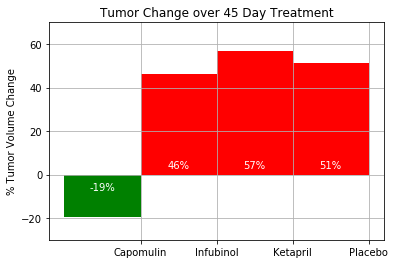

In [16]:
# After experiementing with various plot formats from activities and online, I created my plot codes, using my own variables and dataframes, drawing upon an example by Aritra23 @ https://github.com/Aritra23/matplotlib-challenge/blob/master/Pymaceuticals/pymaceuticals_solved.ipynb
# Store all Relevant Percent Changes into a Tuple

passing_drug = percent_change < 0

# Splice the data between passing and failing drugs

drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
drug_percent_change = [(percent_change[drug])for drug in drug_list]
drug_pass_fail_slice = plt.bar(drug_list,drug_percent_change,width=-1,align='edge',color=passing_drug.map({True:'g',False:'r'}))

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def labelplot(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
                
# Call functions to implement the function calls
labelplot(drug_pass_fail_slice)

# Save the Figure
plt.savefig("TumorChangeOver45DayTreatment.png")

#Show the figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)